<a href="https://colab.research.google.com/github/soumyajt1991/Facebook-Comment-Volume-Prediction/blob/main/Soumyajit_Das_Team_5_Facebook_Comment_Volume_Prediction_Capstone_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Facebook Comment Volume Prediction**

Problem Statement - Prediction of comment volume traffic or the number of comments on a given post

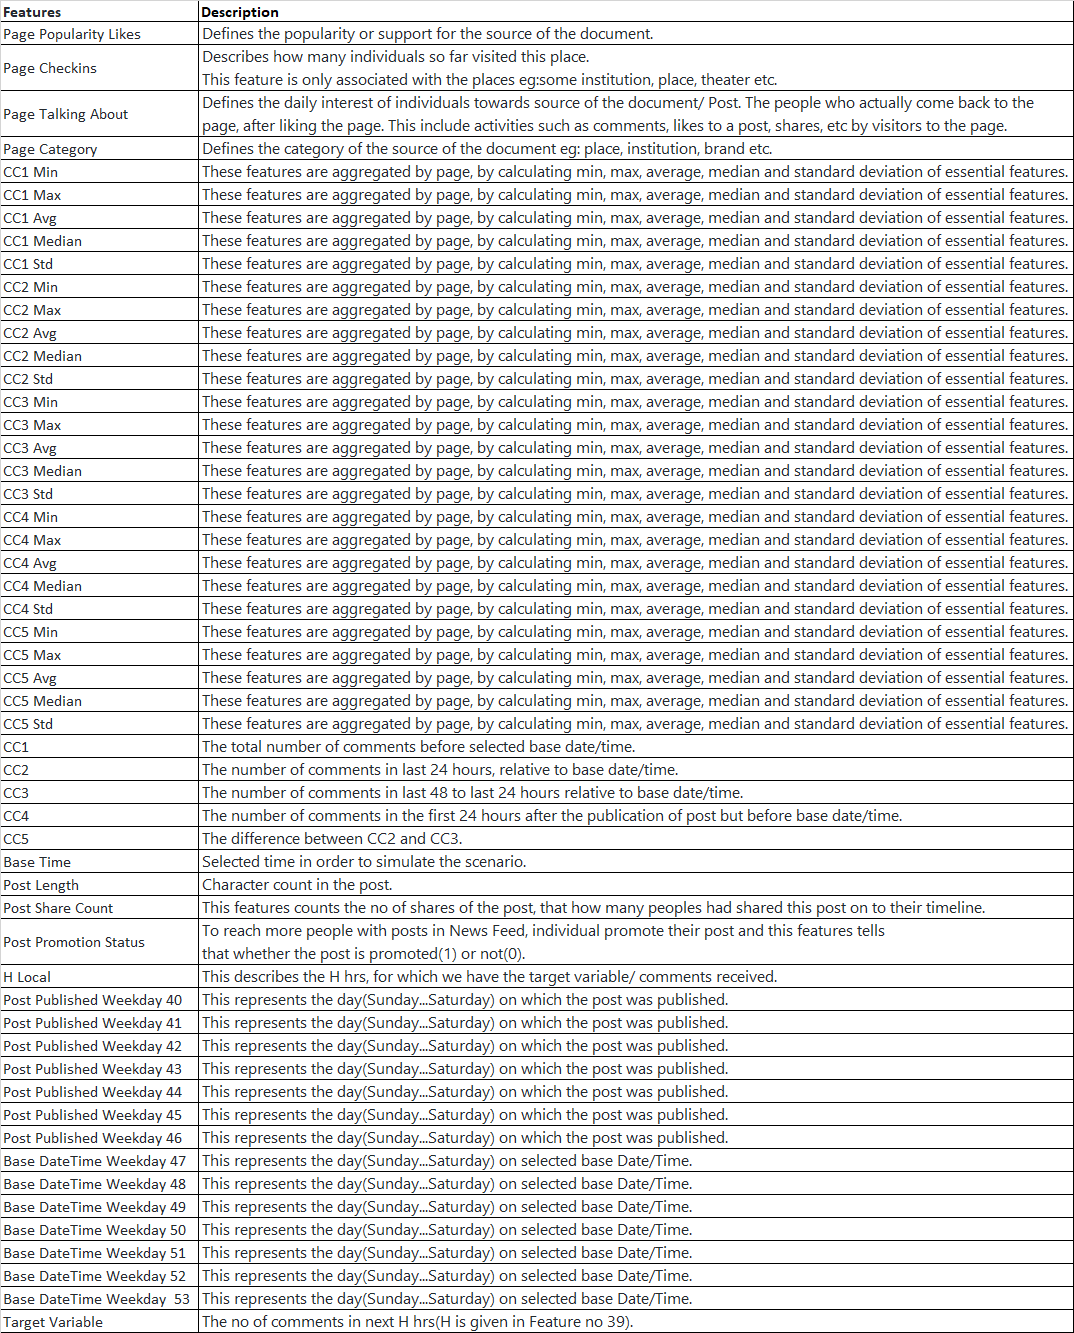

In [4]:
# mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
# importing libraries
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_classif
from pandas.api.types import CategoricalDtype

In [2]:
# assigning column names
columns=['Likes','Checkins','Returns','Category','CC1_min','CC1_max','CC1_avg','CC1_med','CC1_sd','CC2_min','CC2_max','CC2_avg','CC2_med','CC2_sd','CC3_min','CC3_max','CC3_avg','CC3_med','CC3_sd','CC4_min','CC4_max','CC4_avg','CC4_med','CC4_sd','CC5_min','CC5_max','CC5_avg','CC5_med','CC5_sd','CC1','CC2','CC3','CC4','CC5','base_time','post_length','post_share_count','post_promotion_status','H_local','sun_post_day','mon_post_day','tue_post_day','wed_post_day','thu_post_day','fri_post_day','sat_post_day','sun_base_day','mon_base_day','tue_base_day','wed_base_day','thu_base_day','fri_base_day','sat_base_day','output']

In [6]:
# reading train (variant 1) dataset 
fb_tr1 = pd.read_csv('/content/drive/MyDrive/AlmaBetter/Cohort Aravali/Module 4/Week 2/Day 3/Train/Features_Variant_1.csv',header=None) 
fb_tr1.columns=columns

In [7]:
# checking duplicate observation for train dataset
len(fb_tr1[fb_tr1.duplicated()])

8

In [8]:
# removing duplicate observations
fb_tr1=fb_tr1.drop_duplicates()

In [9]:
# checking size of train dataset
fb_tr1.shape

(40941, 54)

In [10]:
# reading test dataset 
test = ['Test_Case_1.csv', 'Test_Case_2.csv', 'Test_Case_3.csv', 'Test_Case_4.csv', 'Test_Case_5.csv', 'Test_Case_6.csv', 'Test_Case_7.csv', 'Test_Case_8.csv', 'Test_Case_9.csv', 'Test_Case_10.csv']
test_location = '/content/drive/MyDrive/AlmaBetter/Cohort Aravali/Module 4/Week 2/Day 3/Test/'
fb_test = pd.concat([pd.read_csv(test_location + test, header=None) for test in test])
fb_test.columns=columns

In [11]:
# checking duplicate observation for test dataset
len(fb_test[fb_test.duplicated()])

0

In [12]:
# checking size of test dataset
fb_test.shape

(1000, 54)

In [13]:
# combining train and test dataset
fb1=pd.concat([fb_tr1,fb_test])

In [14]:
# checking size of final dataset
fb1.shape

(41941, 54)

In [ ]:
fb1.head()

,Likes,Checkins,Returns,Category,CC1_min,CC1_max,CC1_avg,CC1_med,CC1_sd,CC2_min,CC2_max,CC2_avg,CC2_med,CC2_sd,CC3_min,CC3_max,CC3_avg,CC3_med,CC3_sd,CC4_min,CC4_max,CC4_avg,CC4_med,CC4_sd,CC5_min,CC5_max,CC5_avg,CC5_med,CC5_sd,CC1,CC2,CC3,CC4,CC5,base_time,post_length,post_share_count,post_promotion_status,H_local,sun_post_day,mon_post_day,tue_post_day,wed_post_day,thu_post_day,fri_post_day,sat_post_day,sun_base_day,mon_base_day,tue_base_day,wed_base_day,thu_base_day,fri_base_day,sat_base_day,output
0,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,806.0,7.574627,0.0,69.435826,0.0,76.0,2.604478,0.0,8.505502,0.0,806.0,10.649254,1.0,70.254788,-69.0,806.0,4.970149,0.0,69.85058,0,0,0,0,0,65,166,2,0,24,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
1,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,806.0,7.574627,0.0,69.435826,0.0,76.0,2.604478,0.0,8.505502,0.0,806.0,10.649254,1.0,70.254788,-69.0,806.0,4.970149,0.0,69.85058,0,0,0,0,0,10,132,1,0,24,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
2,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,806.0,7.574627,0.0,69.435826,0.0,76.0,2.604478,0.0,8.505502,0.0,806.0,10.649254,1.0,70.254788,-69.0,806.0,4.970149,0.0,69.85058,0,0,0,0,0,14,133,2,0,24,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
3,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,806.0,7.574627,0.0,69.435826,0.0,76.0,2.604478,0.0,8.505502,0.0,806.0,10.649254,1.0,70.254788,-69.0,806.0,4.970149,0.0,69.85058,7,0,3,7,-3,62,131,1,0,24,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
4,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,806.0,7.574627,0.0,69.435826,0.0,76.0,2.604478,0.0,8.505502,0.0,806.0,10.649254,1.0,70.254788,-69.0,806.0,4.970149,0.0,69.85058,1,0,0,1,0,58,142,5,0,24,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0


In [ ]:
fb1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41941 entries, 0 to 99
Data columns (total 54 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Likes                  41941 non-null  int64  
 1   Checkins               41941 non-null  int64  
 2   Returns                41941 non-null  int64  
 3   Category               41941 non-null  int64  
 4   CC1_min                41941 non-null  float64
 5   CC1_max                41941 non-null  float64
 6   CC1_avg                41941 non-null  float64
 7   CC1_med                41941 non-null  float64
 8   CC1_sd                 41941 non-null  float64
 9   CC2_min                41941 non-null  float64
 10  CC2_max                41941 non-null  float64
 11  CC2_avg                41941 non-null  float64
 12  CC2_med                41941 non-null  float64
 13  CC2_sd                 41941 non-null  float64
 14  CC3_min                41941 non-null  float64
 15  CC3_m

In [ ]:
# target variable 'output' is of continuous type
# all 53 features are of of continuous type  
# no missing value

In [ ]:
fb1.describe().T

,count,mean,std,min,25%,50%,75%,max
Likes,41941.0,1.373402e+06,6.854449e+06,36.0,40368.000000,309914.000000,1.294733e+06,4.869723e+08
Checkins,41941.0,4.691625e+03,2.131004e+04,0.0,0.000000,0.000000,9.900000e+01,1.100558e+06
Returns,41941.0,5.015958e+04,1.380725e+05,0.0,745.000000,8153.000000,5.320700e+04,6.784263e+06
Category,41941.0,2.419761e+01,1.997070e+01,1.0,9.000000,18.000000,3.200000e+01,1.060000e+02
CC1_min,41941.0,1.761570e+00,2.343162e+01,0.0,0.000000,0.000000,0.000000e+00,2.341000e+03
CC1_max,41941.0,4.493789e+02,5.079653e+02,0.0,45.000000,241.000000,7.170000e+02,2.858000e+03
CC1_avg,41941.0,5.670343e+01,8.965575e+01,0.0,5.703704,23.842105,7.298077e+01,2.341000e+03
CC1_med,41941.0,3.615927e+01,7.209885e+01,0.0,2.000000,12.000000,4.200000e+01,2.341000e+03
CC1_sd,41941.0,6.881948e+01,8.436249e+01,0.0,8.365189,35.853805,1.058344e+02,1.101000e+03
CC2_min,41941.0,3.197826e-01,1.310852e+01,0.0,0.000000,0.000000,0.000000e+00,1.923000e+03


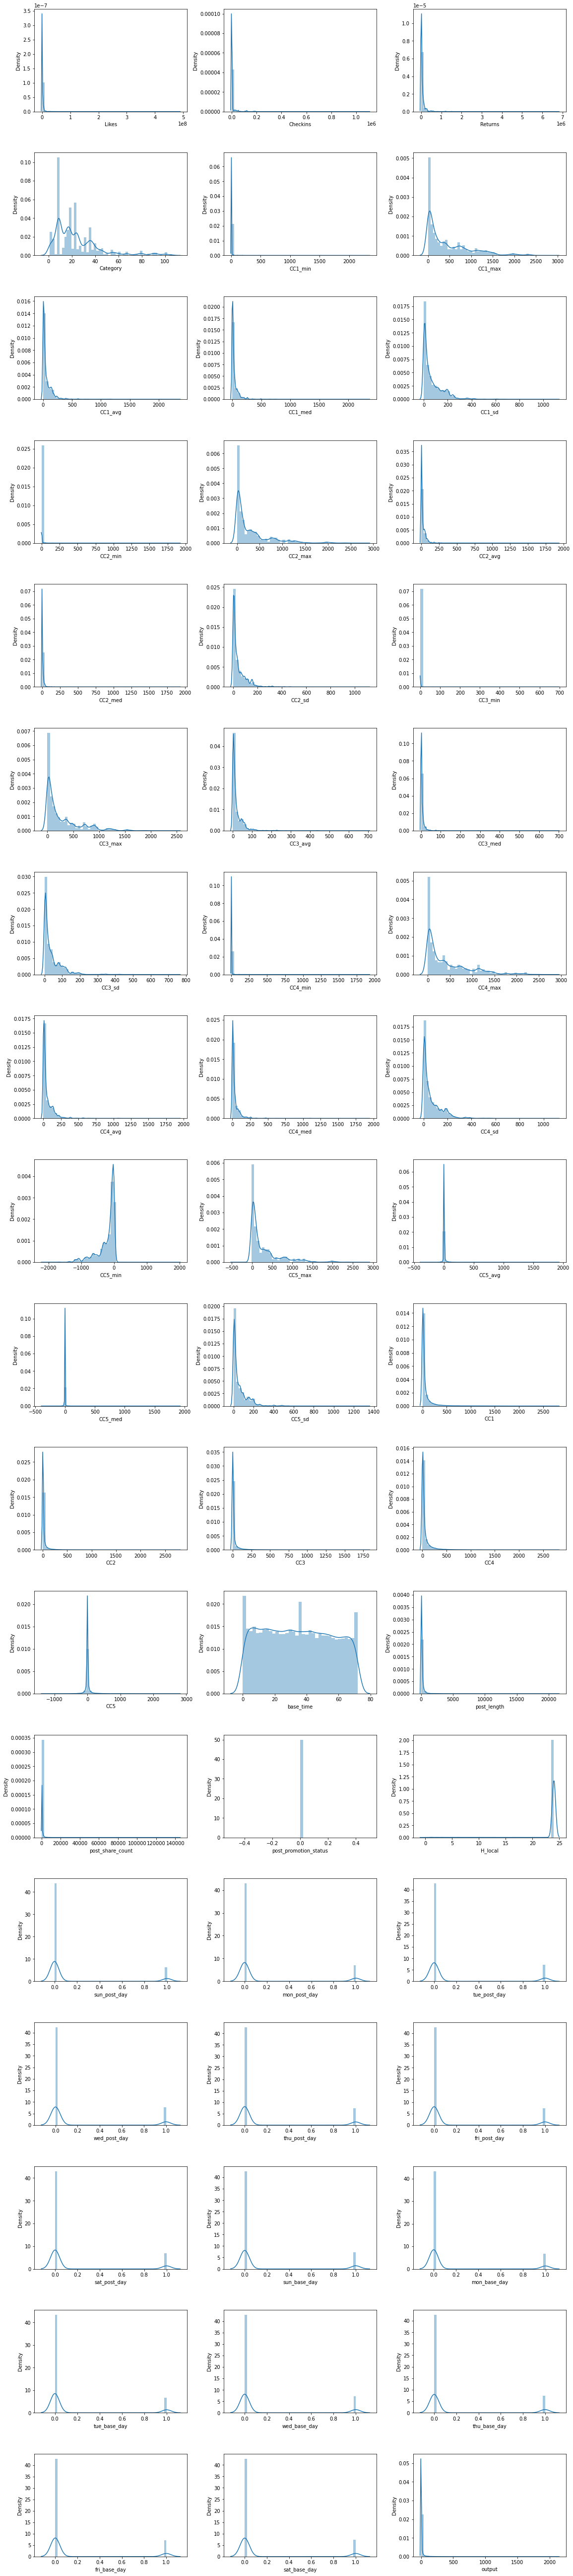

In [ ]:
# distplot for all features
fig,axs=plt.subplots(ncols=3,nrows=18,figsize=(16, 72))
index=0
axs=axs.flatten()
for i in columns:
    sns.distplot(fb1[i],ax=axs[index])
    index=index+1
plt.tight_layout(pad=0.5,w_pad=1,h_pad=5)

In [ ]:
# general observation
# most of the numeric columns are right skewed data with may be large values of '0'
# our target variable is also heavily right skewed 
# 'Category' column according to the description should be of categorical type but given as numerical with label encoding
# 'post_promotion_status' has only one value
# 14 day columns are given as numeric with binary labels '1' and '0'

### target variable study

In [ ]:
# our target variable is 'output'
# it represents 'total comments for any post for a given time'

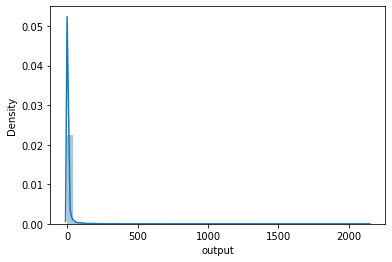

In [ ]:
# countplot
sns.distplot(fb1['output'])
plt.show()

In [ ]:
# value counts
fb1['output'].value_counts()

0      22930
1       5296
2       2701
3       1631
4       1211
       ...  
756        1
245        1
501        1
776        1
735        1
Name: output, Length: 381, dtype: int64

In [ ]:
# percentage value counts
fb1['output'].value_counts(normalize=True).mul(100).round(2)      

0      54.67
1      12.63
2       6.44
3       3.89
4       2.89
       ...  
756     0.00
245     0.00
501     0.00
776     0.00
735     0.00
Name: output, Length: 381, dtype: float64

In [ ]:
# checking percentage of posts with less than or equal to 10 comments 
comm_less10 = fb1[(fb1['output'] <= 10)]
(len(fb1[(fb1['output'] <= 10)])/fb1.shape[0])*100

88.23823943158247

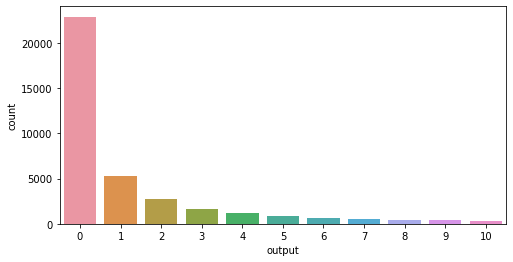

In [ ]:
# countplot of posts with <=10 comments
plt.figure(figsize=(8, 4))
sns.countplot(x=comm_less10['output'], data=comm_less10)
plt.show()

In [ ]:
# 55% of posts have nil comments
# high number of posts have very few comments
# 88% of post with <= 10 comments with descending order
# we can also confirm these facts from above distplot which is very skewed

### predictor variable study

In [ ]:
# 1. Likes

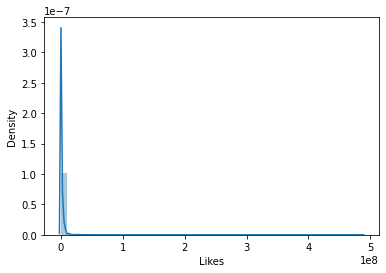

In [ ]:
# distplot
sns.distplot(fb1['Likes'])
plt.show()

In [ ]:
# percentage value counts
len(fb1[(fb1['Likes']==0)])

0

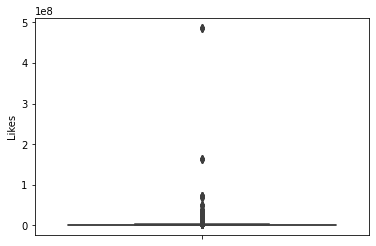

In [ ]:
# boxplot
sns.boxplot(y=fb1['Likes'],data=fb1)
plt.show()

In [ ]:
# no '0' values i.e each post has atleast 1 like
# from the above plots we can confirm high skewness is because of presence of outlier
# we will try to remove the outliers using IQR

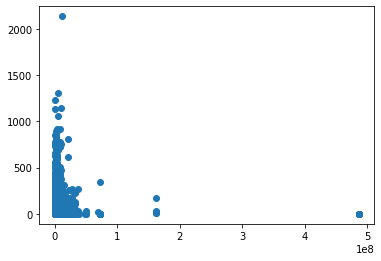

In [ ]:
# scatter plot between 'Likes' and 'output'
plt.scatter(fb1['Likes'],fb1['output'])
plt.show()

In [ ]:
# 2. Checkins

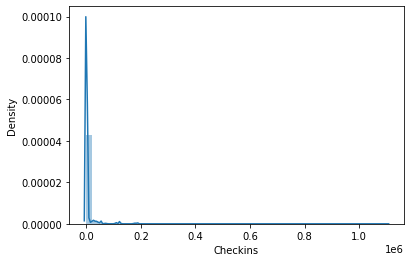

In [ ]:
# distplot
sns.distplot(fb1['Checkins'])
plt.show()

In [ ]:
# percentage '0' value counts
fb1['Checkins'].value_counts(normalize=True).mul(100).round(2) 

0          62.26
1           3.25
148         1.17
11          1.12
4           0.94
           ...  
26          0.00
59780       0.00
228         0.00
1100558     0.00
628         0.00
Name: Checkins, Length: 204, dtype: float64

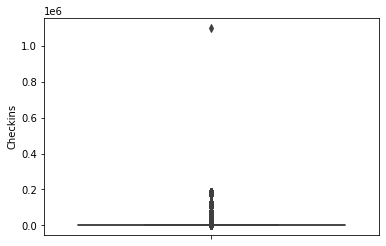

In [ ]:
# boxplot
sns.boxplot(y=fb1['Checkins'],data=fb1)
plt.show()

In [ ]:
# 62% values consists of '0' values
# from the above plots we can confirm high skewness is because of presence of outlier
# we will try to remove the outliers using IQR

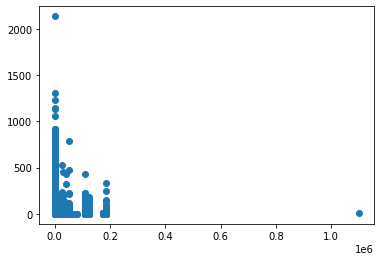

In [ ]:
# scatter plot between 'Checkins' and 'output'
plt.scatter(fb1['Checkins'],fb1['output'])
plt.show()

In [ ]:
# 3. Returns

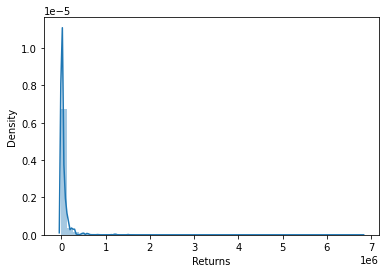

In [ ]:
# distplot
sns.distplot(fb1['Returns'])
plt.show()

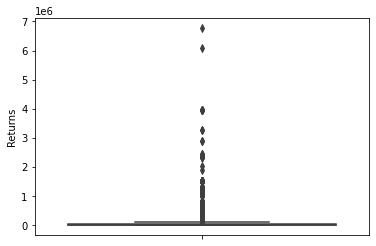

In [ ]:
# boxplot
sns.boxplot(y=fb1['Returns'],data=fb1)
plt.show()

In [ ]:
# from the above plots we can confirm high skewness is because of presence of outlier
# we will try to remove the outliers using IQR

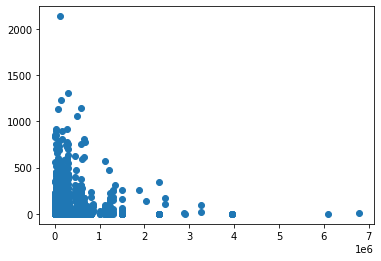

In [ ]:
# scatter plot between 'Returns' and 'output'
plt.scatter(fb1['Returns'],fb1['output'])
plt.show()

In [ ]:
# 4. Category

In [ ]:
# Defines the category of the source of the document eg: place, institution, brand etc.
# type of the variable should be of 'category'

In [ ]:
# checking total number of unique values
len(fb1['Category'].unique())

97

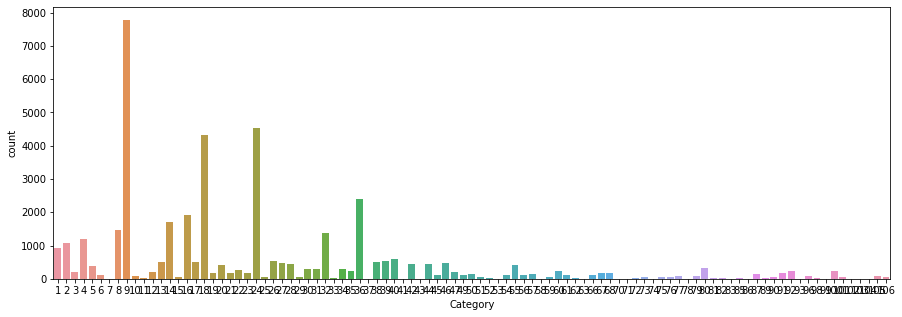

In [20]:
plt.figure(figsize=(15, 5))
sns.countplot(x=fb1['Category'])
plt.show()

In [ ]:
# it has been given with label encoding
# we are unable to map the categories to correct label
# it has 106 labels, if we try one-hot encoding we will end up with very high dimension.
# if the data is available we could have done category binding to reduce the number of labels and try one-hot encoding
# for now we are removing the column

In [ ]:
fb1 = fb1.drop('Category',axis=1)

In [ ]:
# 30-34 - CC1,CC2,CC3,CC4 and CC5

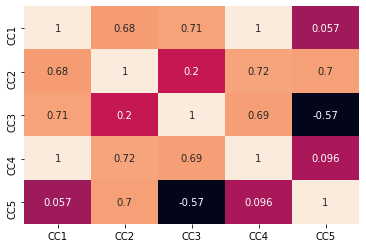

In [ ]:
# # let's check correlation between essential features using heatmap
essential = fb1[['CC1','CC2','CC3','CC4','CC5']]
sns.heatmap(essential.corr(), annot = True, cbar=False)
plt.show()

In [ ]:
# CC1 and CC4 has correlation of 1
# according to the definition, CC5=CC2-CC3, so among CC2, CC3 and CC5 we can remove one column to reduce the redundancy
# we will take decision after doing any fetaure selection method

In [ ]:
# 5-29. Derived variables - min, max, avg, med and sd of CC features

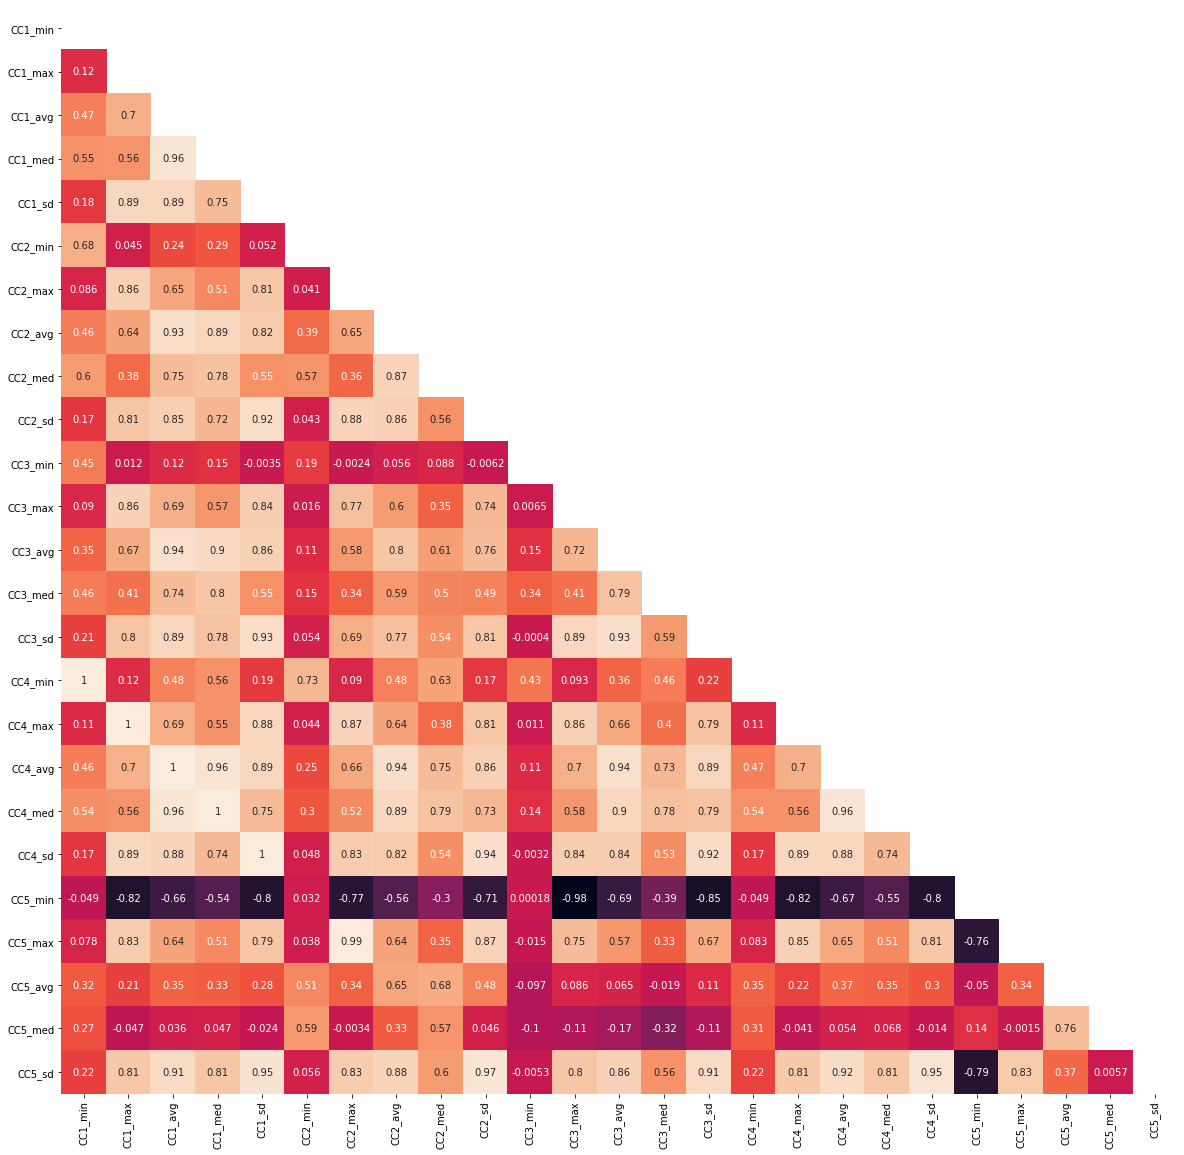

In [ ]:
# let's check correlation between derived features using heatmap
derived = fb1[['CC1_min','CC1_max','CC1_avg','CC1_med','CC1_sd','CC2_min','CC2_max','CC2_avg','CC2_med','CC2_sd','CC3_min','CC3_max','CC3_avg','CC3_med','CC3_sd','CC4_min','CC4_max','CC4_avg','CC4_med','CC4_sd','CC5_min','CC5_max','CC5_avg','CC5_med','CC5_sd']]
matrix = np.triu(derived.corr())
plt.figure(figsize=(20, 20))
sns.heatmap(derived.corr(), annot = True, cbar=False, mask=matrix)
plt.show()

In [ ]:
# similar to previous observation as CC1 and CC4 has very high correlation, here we can see derived features of CC1 and CC4 have very high correlation
# many of other variables also have high correlation between them
# we can remove many variables
# we will take decision after doing any fetaure selection method

In [ ]:
# 35. base_time

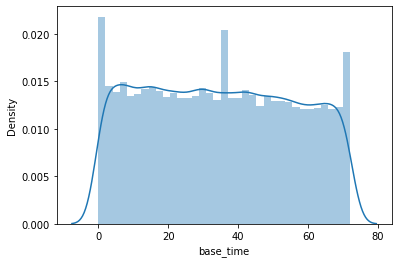

In [15]:
# distplot
sns.distplot(fb1['base_time'])
plt.show()

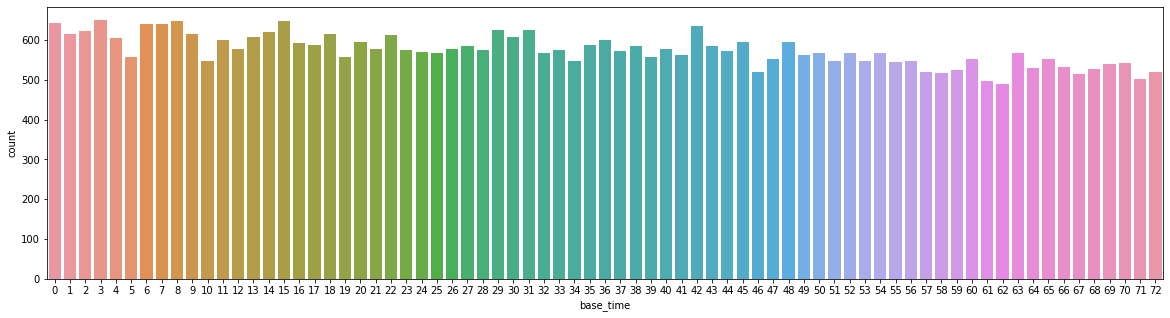

In [17]:
# countplot
plt.figure(figsize=(20, 5))
sns.countplot(fb1['base_time'])
plt.show()

In [ ]:
# almost uniformly distributed
# for base_time <=24, CC1=CC2=CC4 and CC3=0 and CC5=CC2-CC3=CC2. 
# So, CC1=CC2=CC4=CC5 and CC3=0

In [48]:
# correlation check between essential variables (CC1,CC2,CC4,CC5) for basetime less than or equal to 24hrs
base_time_24 = fb1[fb1.base_time<=24]
base_time_24[['CC1','CC2','CC4','CC5']].corr()

,CC1,CC2,CC4,CC5
CC1,1.0,1.0,1.0,1.0
CC2,1.0,1.0,1.0,1.0
CC4,1.0,1.0,1.0,1.0
CC5,1.0,1.0,1.0,1.0


In [59]:
# total no. of percentage observations for which we can see this pattern
round(base_time_24.shape[0]/fb1.shape[0]*100)

36

In [ ]:
# so for 36% of total data points we will have same value of CC1,CC2,CC4,CC5 and CC3=0

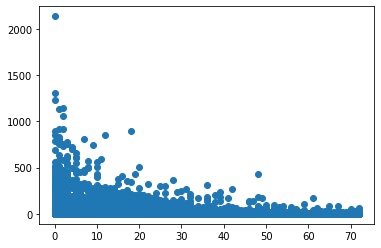

In [87]:
# scatter plot between 'base_time' and 'output'
plt.scatter(fb1['base_time'],fb1['output'])
plt.show()

In [ ]:
# 36. post_length

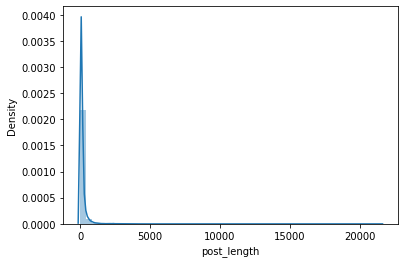

In [ ]:
# distplot
sns.distplot(fb1['post_length'])
plt.show()

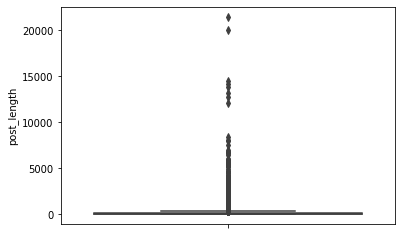

In [ ]:
# boxplot
sns.boxplot(y=fb1['post_length'],data=fb1)
plt.show()

In [ ]:
# no of posts with 0 length
# we can say these are anolmalies
len(fb1[(fb1['post_length']==0)])

4632

In [ ]:
# no of posts in training data (variant 1) with 0 length
len(fb_tr1[(fb_tr1['post_length']==0)])

4579

In [ ]:
# no of posts in test data with 0 length
len(fb_test[(fb_test['post_length']==0)])

53

In [ ]:
# removing posts of 0 length from train and test and then combining
fb_tr1 = fb_tr1[(fb_tr1['post_length']>0)]
fb_test = fb_test[(fb_test['post_length']>0)]
fb1=pd.concat([fb_tr1,fb_test])

In [ ]:
# checking new size of dataset
fb1.shape

(37309, 54)

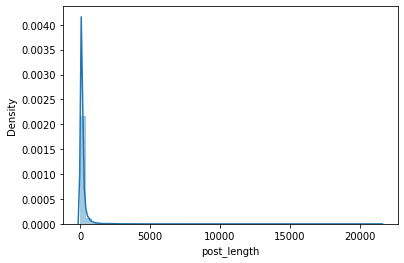

In [ ]:
# distplot
sns.distplot(fb1['post_length'])
plt.show()

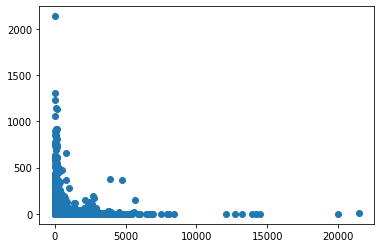

In [ ]:
# scatterplot between 'post_length' and 'output'
plt.scatter(fb1['post_length'],fb1['output'])
plt.show()

In [ ]:
#
#

In [ ]:
# 37. post_share_count

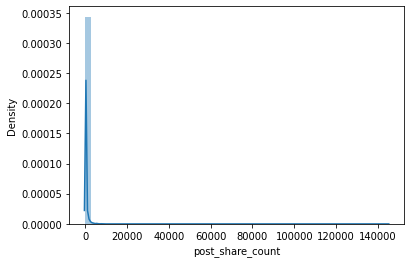

In [ ]:
# distplot
sns.distplot(fb1['post_share_count'])
plt.show()

In [ ]:
# value counts
fb1.post_share_count.value_counts()

1       7692
2       3989
3       2291
4       1320
11       714
        ... 
2832       1
657        1
2640       1
561        1
5325       1
Name: post_share_count, Length: 1598, dtype: int64

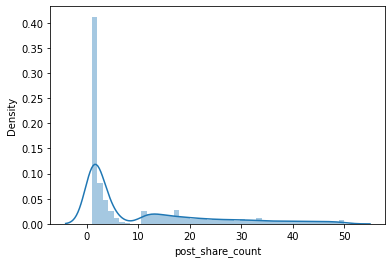

In [ ]:
# distplot of post share <=50
share_50 = fb1[(fb1['post_share_count']<=50)]
sns.distplot(share_50['post_share_count'])
plt.show()

In [ ]:
# percentage of post with <=15 share counts
len(fb1[(fb1['post_share_count']<=15)])/fb1.shape[0]*100

51.82127636763247

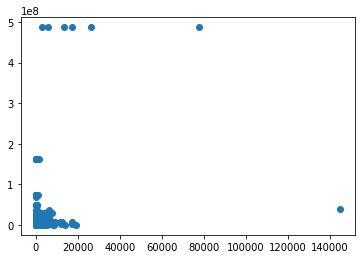

In [ ]:
# scatterplot between 'post_length' and 'output'
plt.scatter(fb1['post_share_count'],fb1['Likes'])
plt.show()

In [ ]:
# 50% of posts have less than or equal to 15 share count
# 

In [ ]:
# 38. post_promotion_status

In [ ]:
fb1['post_promotion_status'].unique()

array([0])

In [ ]:
# variable 'post_promotion_status' to be removed as it has only one value

In [ ]:
fb1 = fb1.drop('post_promotion_status',axis=1)

In [ ]:
# 39. H_local

In [ ]:
# it has 24 different hours as column values 

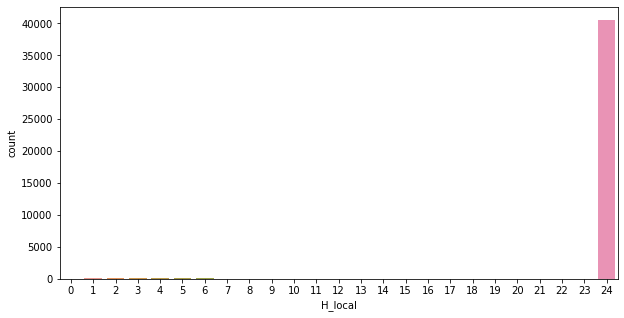

In [ ]:
# countplot
plt.figure(figsize=(10, 5))
sns.countplot(fb1['H_local'])
plt.show()

In [ ]:
# percentage of value counts
fb1['H_local'].value_counts(normalize=True).mul(100).round(2)  

24    96.66
1      0.29
2      0.21
3      0.20
6      0.19
5      0.17
4      0.16
9      0.15
13     0.14
8      0.14
19     0.14
10     0.14
17     0.13
20     0.13
11     0.13
16     0.12
12     0.12
7      0.12
22     0.12
21     0.12
18     0.11
23     0.11
15     0.10
14     0.09
0      0.02
Name: H_local, dtype: float64

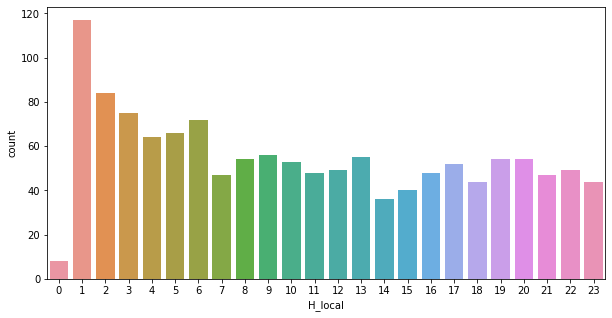

In [ ]:
# countplot of H_local < 24
H_less24 = fb1[(fb1['H_local']<24)]
plt.figure(figsize=(10, 5))
sns.countplot(H_less24['H_local'])
plt.show()

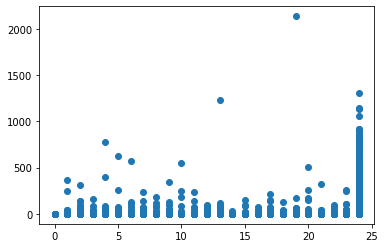

In [ ]:
# scatter plot between 'H_local' and 'output'
plt.scatter(fb1['H_local'],fb1['output'])
plt.show()

In [ ]:
# H_local_24 = fb1[fb1['H_local']==24 & fb1['output']==0]

len(fb1[(fb1['H_local']==24) & (fb1['output']==0)])
# sns.distplot(H_local_24['output'])
# plt.show()

19368

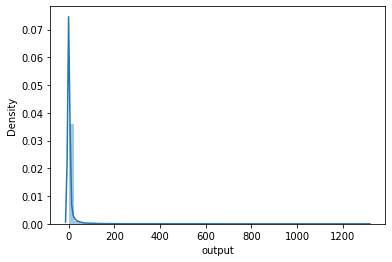

In [ ]:
# scatter plot between 'H_local=24' and 'output'
H_local_24 = fb1[(fb1['H_local']==24)]
sns.distplot(H_local_24['output'])
plt.show()

In [ ]:
#

In [ ]:
# 40-53. day column
# 40-46 - post published day

In [29]:
fb1_postday=fb1[['sun_post_day','mon_post_day','tue_post_day','wed_post_day','thu_post_day','fri_post_day','sat_post_day']]
fb1_baseday=fb1[['sun_base_day','mon_base_day','tue_base_day','wed_base_day','thu_base_day','fri_base_day','sat_base_day']]
days=['sunday','monday','tuesday','wednesday','thursday','friday','saturday']
fb1_postday.columns=days
fb1_baseday.columns=days
fb1_postday['postday'] = fb1_postday.idxmax(axis=1)
fb1_baseday['baseday'] = fb1_baseday.idxmax(axis=1)

cat_type = CategoricalDtype(categories=days, ordered=True)
fb1['postday'] = fb1_postday['postday'].astype(cat_type)
fb1['baseday'] = fb1_baseday['baseday'].astype(cat_type)

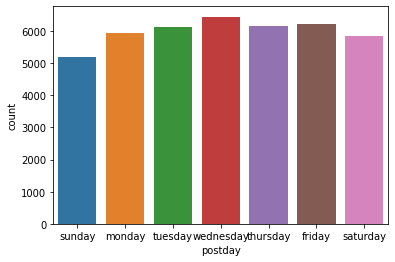

In [30]:
# countplot
sns.countplot(fb1['postday'])
plt.show()

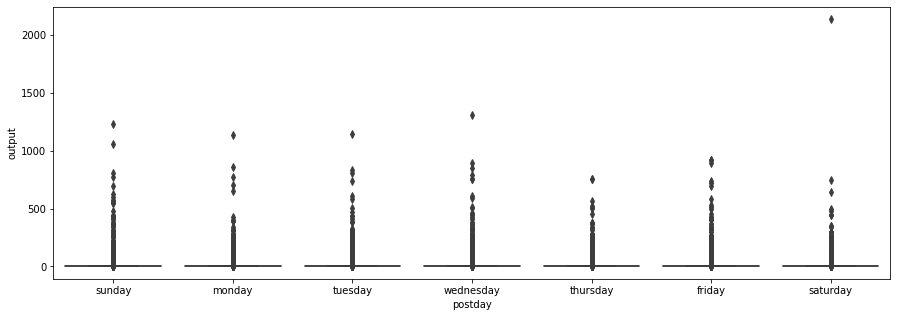

In [35]:
# boxplot between "postday" and "output"
plt.figure(figsize=(15, 5))
sns.boxplot(x="postday", y="output", data=fb1)
plt.show()

In [ ]:
# distribution of postdays are almost uniform i.e postday is selected in random way
# from the distribution with 'output', we can see that distribution for each day is overlapped by all other day
# seems these are not significant, can remove all of them 

In [ ]:
# 47-53 - baseday

In [ ]:
# converting binary label columns to single column to check the distribution 

fb1_baseday=fb1[['sun_base_day','mon_base_day','tue_base_day','wed_base_day','thu_base_day','fri_base_day','sat_base_day']]
fb1_baseday.columns=days
fb1_baseday['baseday'] = fb1_baseday.idxmax(axis=1)
fb1['baseday'] = fb1_baseday['baseday'].astype(cat_type)

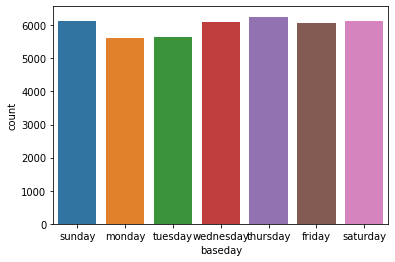

In [36]:
# countplot
sns.countplot(fb1['baseday'])
plt.show()

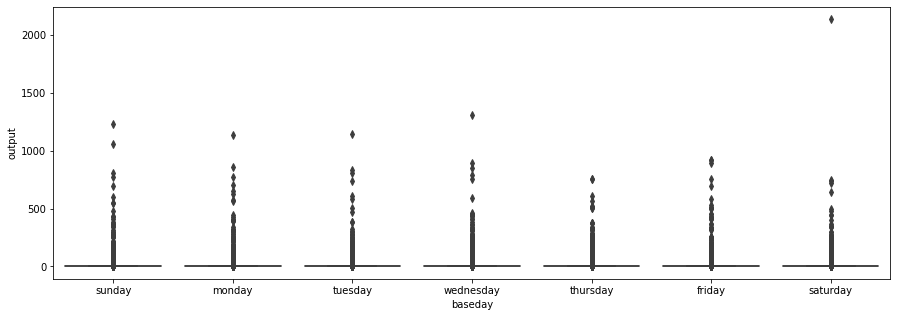

In [37]:
# boxplot between "baseday" and "output"
plt.figure(figsize=(15, 5))
sns.boxplot(x="baseday", y="output", data=fb1)
plt.show()

In [ ]:
# distribution of basedays are almost uniform i.e baseday is selected in random way
# from the distribution with 'output', we can see that distribution for each day is overlapped by all other day
# seems these are not significant, can remove all of them 

In [ ]:
X1=fb1.drop('output',1)
Y1=fb1['output']

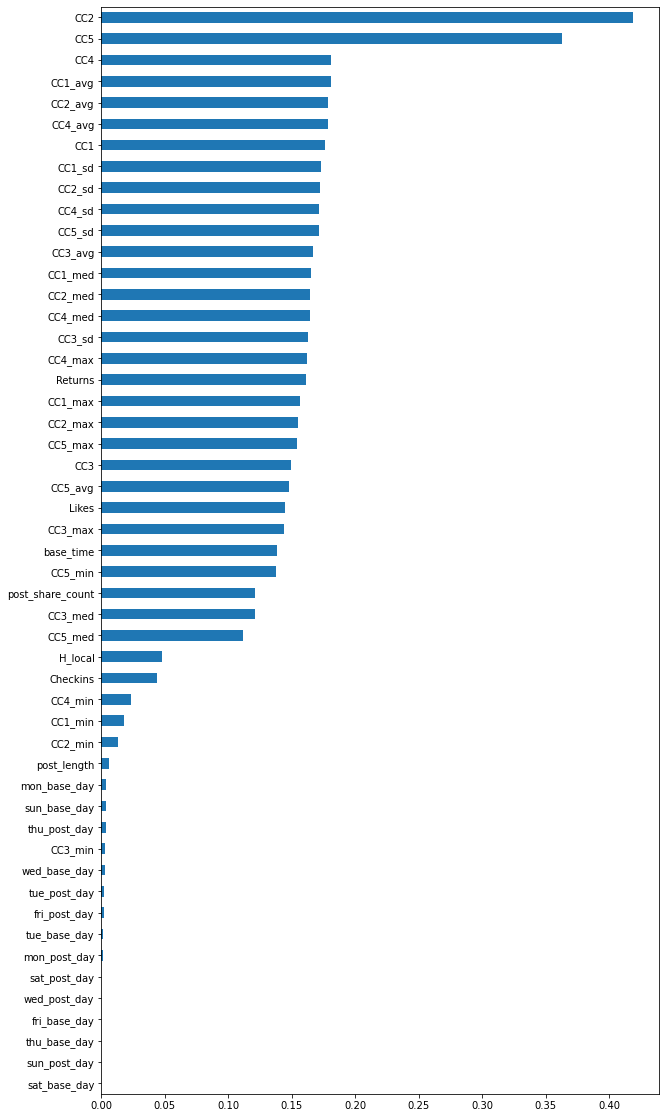

In [ ]:
# feature importance check using 'information gain'
importances=mutual_info_classif(X1,Y1)
feat_importances=pd.Series(importances,fb1.columns[0:len(fb1.columns)-1])
feat_importances=feat_importances.sort_values()
plt.figure(figsize=(10, 20))
feat_importances.plot(kind='barh')
plt.show()

In [ ]:
dependent_variable = 'output'
independent_variables = list(set(fb1.columns.tolist()) - {dependent_variable})

In [ ]:
# Create train data 

X=fb1.iloc[:40941]

# Create train data of independent variables
X_train = X[independent_variables].values

# Create train data of dependent variable 
y_train = X[dependent_variable].values

In [ ]:
# Create test data 

X1=fb1.iloc[-100:]

# Create test data of independent variables
X_test = X1[independent_variables].values

# Create test data of dependent variable 
y_test = X1[dependent_variable].values

In [ ]:
# PCA

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
from sklearn.decomposition import PCA

pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [ ]:
explained_variance = pca.explained_variance_ratio_

In [ ]:
explained_variance

array([3.40175034e-01, 7.88460250e-02, 4.85604033e-02, 4.02872887e-02,
       3.91218892e-02, 3.61025770e-02, 3.47696492e-02, 3.25468723e-02,
       2.74429956e-02, 2.59897560e-02, 2.53001973e-02, 2.48713416e-02,
       2.42508633e-02, 2.21726234e-02, 2.15099022e-02, 2.08720232e-02,
       2.06319489e-02, 1.99129985e-02, 1.79474858e-02, 1.68674548e-02,
       1.40595127e-02, 1.28854737e-02, 9.01298198e-03, 7.85869684e-03,
       7.22508938e-03, 5.81693932e-03, 5.33451420e-03, 4.60585844e-03,
       3.92390296e-03, 3.12376158e-03, 2.84713168e-03, 1.98549137e-03,
       1.34779546e-03, 5.44077794e-04, 4.53752127e-04, 2.64290196e-04,
       1.32790907e-04, 1.09151160e-04, 8.87826612e-05, 5.01415683e-05,
       4.78175063e-05, 3.88161075e-05, 3.53303883e-05, 1.62022421e-05,
       1.09335660e-05, 1.43522340e-06, 2.41268428e-33, 2.11411074e-33,
       1.90934956e-33, 1.58810087e-33])

In [ ]:
pca = PCA(n_components=10)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(max_depth=12,max_leaf_nodes=14,min_samples_leaf=9,min_samples_split=7)
regr.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=12, max_features='auto', max_leaf_nodes=14,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=9,
                      min_samples_split=7, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
y_pred = regr.predict(X_test)
y_pred_train = regr.predict(X_train)

In [ ]:
from sklearn.metrics import mean_squared_error
from numpy import math
from sklearn.metrics import r2_score

In [ ]:
n1=len(X_train)+len(X_test)
n2=len(y_train)+len(y_test)
n3=len(fb1_tr.columns)-1

In [ ]:
# comparison between train dataset and test dataset

# train data performance
train_MSE=mean_squared_error(y_train, y_pred_train)
train_RMSE=math.sqrt(train_MSE)
train_MAE=np.mean(np.absolute(y_train-y_pred_train))
train_MAPE=(np.mean(np.absolute((y_train-y_pred_train)/y_train)))*100
train_R2=r2_score(y_train, y_pred_train)
train_adjusted_R2=1-((1-train_R2)*(n2-1)/(n2-n3-1))
train_measures=[train_MSE,train_RMSE,train_MAE,train_MAPE,train_R2,train_adjusted_R2]

# test data performance
MSE=mean_squared_error(y_test,y_pred)
RMSE=math.sqrt(MSE)
MAE=np.mean(np.absolute(y_test-y_pred))
MAPE=(np.mean(np.absolute((y_test-y_pred)/y_test)))*100

R2=r2_score(y_test,y_pred)
adjusted_R2=1-((1-R2)*(n2-1)/(n2-n3-1))
test_measures=[MSE,RMSE,MAE,MAPE,R2,adjusted_R2]

In [ ]:
# performance comparison table
perf_table=pd.DataFrame() 
perf_table["feature"]=['MSE','RMSE','MAE','MAPE','R2','adjusted_R2']
  
perf_table["train"]=train_measures
perf_table["test"]=test_measures

print(perf_table)

       feature       train         test
0          MSE  779.385767  4111.667523
1         RMSE   27.917481    64.122286
2          MAE    7.032066    24.004590
3         MAPE         inf          inf
4           R2    0.381474     0.417602
5  adjusted_R2    0.380674     0.416849


In [ ]:
importances = regr.feature_importances_
X2=X.drop('output',axis=1)

In [ ]:
importance_dict = {'Feature' : list(X2.columns),
                   'Feature Importance' : importances}

importance_df = pd.DataFrame(importance_dict)

In [ ]:
importance_df['Feature Importance'] = round(importance_df['Feature Importance'],2)

In [ ]:
importance_df.sort_values(by=['Feature Importance'],ascending=False)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(max_depth=12,max_leaf_nodes=14,min_samples_leaf=9,min_samples_split=7)
regr.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=12, max_features='auto', max_leaf_nodes=14,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=9,
                      min_samples_split=7, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
y_pred = regr.predict(X_test)
y_pred_train = regr.predict(X_train)

In [ ]:
from sklearn.metrics import mean_squared_error
from numpy import math
from sklearn.metrics import r2_score

In [ ]:
n1=len(X_train)+len(X_test)
n2=len(y_train)+len(y_test)
n3=len(fb1_tr.columns)-1

In [ ]:
# comparison between train dataset and test dataset

# train data performance
train_MSE=mean_squared_error(y_train, y_pred_train)
train_RMSE=math.sqrt(train_MSE)
train_MAE=np.mean(np.absolute(y_train-y_pred_train))
train_MAPE=(np.mean(np.absolute((y_train-y_pred_train)/y_train)))*100
train_R2=r2_score(y_train, y_pred_train)
train_adjusted_R2=1-((1-train_R2)*(n2-1)/(n2-n3-1))
train_measures=[train_MSE,train_RMSE,train_MAE,train_MAPE,train_R2,train_adjusted_R2]

# test data performance
MSE=mean_squared_error(y_test,y_pred)
RMSE=math.sqrt(MSE)
MAE=np.mean(np.absolute(y_test-y_pred))
MAPE=(np.mean(np.absolute((y_test-y_pred)/y_test)))*100
R2=r2_score(y_test,y_pred)
adjusted_R2=1-((1-R2)*(n2-1)/(n2-n3-1))
test_measures=[MSE,RMSE,MAE,MAPE,R2,adjusted_R2]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in true_divide
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in true_divide
  app.launch_new_instance()


In [ ]:
# performance comparison table
perf_table=pd.DataFrame() 
perf_table["feature"]=['MSE','RMSE','MAE','MAPE','R2','adjusted_R2']
  
perf_table["train"]=train_measures
perf_table["test"]=test_measures

print(perf_table)

       feature       train         test
0          MSE  432.226857  3918.640862
1         RMSE   20.790066    62.599048
2          MAE    5.052973    24.181600
3         MAPE         inf          inf
4           R2    0.656982     0.444944
5  adjusted_R2    0.656597     0.444321


In [ ]:
# Number of trees
n_estimators = [40,60,80,100]

# Maximum depth of trees
max_depth = [6,10,14,18]

# Minimum number of samples required to split a node
min_samples_split = [10,30,50,100]

# Minimum number of samples required at each leaf node
min_samples_leaf = [10,25,40,60]

# HYperparameter Grid
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

In [ ]:
from sklearn.model_selection import GridSearchCV
# Create an instance of the RandomForestClassifier
rf_model = RandomForestRegressor()

# Grid search
rf_grid = GridSearchCV(estimator=rf_model,
                       param_grid = param_dict,
                       cv = 5)

rf_grid.fit(X_train,y_train)

KeyboardInterrupt: ignored